In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime
# Remove unnecessary things
from keras.models import Sequential 
from keras.models import load_model
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import img_to_array, load_img
# Needed?
#for dirname, _, filenames in os.walk('/data/fruits-360'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
!ls "/content/drive/My Drive"

'assignment 1 d7009e.gdoc'
'Assignment 1.drawio'
'Assignment 1.pdf'
 assignment_4_tree.drawio
 best_model
 best_model.h5
 checklist.gdoc
'Colab Notebooks'
'Copy of Bonusuppgifter 2020-10-26 (1).gdoc'
'Copy of Bonusuppgifter 2020-10-26 (2).gdoc'
'Copy of Bonusuppgifter 2020-10-26.gdoc'
'Copy of d0018e tenta'
'cv Magnus.docx'
 d0003e_2_2.7z
 d0003e.zip
 D0013e
 d0018e-2021-03-18.gdoc
'D0018E B+.gdoc'
'd0018e tenta.drawio'
 D0018E_tenta.drawio
'd0018e tenta.png'
 D0020E
'd7009e tentor'
 D7030E
 d7032e
 d7041e
 d7046e
'dugga d0029e.gdoc'
 E0013e
 f0006t.gdoc
 Frågor.gdoc
 Fruit_360_model.h5
 Fruit_quality_dataset.zip
 FurniGarden.drawio
'Getting started.pdf'
 karta_märkesförsäljning.png
 lab1d0029e.gdoc
 LAB1_scenario1.cc
'lab 2 d0029e.gdoc'
'lab3 d0029e.gdoc'
'lab4 d0029e.gdoc'
'lab5 d0029e.gdoc'
'Lab6 d0029e.gdoc'
'Läxa phösarhelgen, Lördag.docx'
'Läxa phösarhelgen, Söndag.docx'
 Lunchmöten
 model_360.ckpt
'Namnlöst diagram (1).drawio'
'Namnlöst diagram (2).drawio'
'Namnlös

In [9]:
!unzip "/content/drive/My Drive/Fruit_quality_dataset"

Utdata för streaming har trunkerats till de sista 5000 raderna.
  inflating: Fruit_quality_dataset/Train/Pomegranate_spoiled/RottenPomegranate (82).jpg  
  inflating: Fruit_quality_dataset/Train/Pomegranate_spoiled/RottenPomegranate (83).jpg  
  inflating: Fruit_quality_dataset/Train/Pomegranate_spoiled/RottenPomegranate (84).jpg  
  inflating: Fruit_quality_dataset/Train/Pomegranate_spoiled/RottenPomegranate (85).jpg  
  inflating: Fruit_quality_dataset/Train/Pomegranate_spoiled/RottenPomegranate (86).jpg  
  inflating: Fruit_quality_dataset/Train/Pomegranate_spoiled/RottenPomegranate (87).jpg  
  inflating: Fruit_quality_dataset/Train/Pomegranate_spoiled/RottenPomegranate (88).jpg  
  inflating: Fruit_quality_dataset/Train/Pomegranate_spoiled/RottenPomegranate (89).jpg  
  inflating: Fruit_quality_dataset/Train/Pomegranate_spoiled/RottenPomegranate (9).jpg  
  inflating: Fruit_quality_dataset/Train/Pomegranate_spoiled/RottenPomegranate (90).jpg  
  inflating: Fruit_quality_dataset/Tr

In [10]:
#Currently working with normal fruit_quality_dataset
train_path = '/content/Fruit_quality_dataset/Train/'
test_path = '/content/Fruit_quality_dataset/Test/'

In [11]:
# Loads Tensorboard
%load_ext tensorboard
# Clear any logs from previous runs
!rm -rf ./logs/

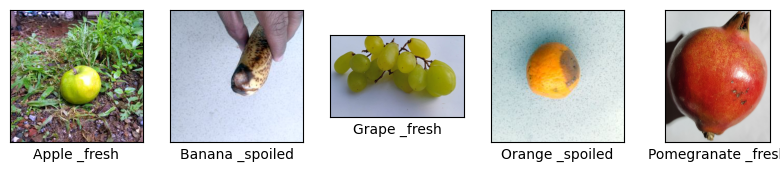

In [12]:
# Insert fruits that you want to inspect
fruits = ['Apple', 'Banana', 'Grape', 'Orange', 'Pomegranate']
# Which image in the folder
fruitnr = 1
ripe=False
Ripe="_fresh"
plt.figure(figsize=(10,10))
for i in range(len(fruits)):
    img = load_img(train_path + "{fruit}{ripe}/{filename}"
                   .format(ripe=Ripe,fruit=fruits[i], filename=os.listdir(train_path +  fruits[i] +Ripe )[fruitnr-1]))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img)
    plt.xlabel(fruits[i] + ' ' + Ripe)
    # Ocillates between Fresh and Spoiled
    if ripe==True:
        Ripe="_fresh"
        ripe=False
    elif ripe==False:
        Ripe="_spoiled"
        ripe=True
plt.show()

In [13]:
img = img_to_array(img)
img.shape

(2421, 1907, 3)

In [26]:
savedModel=load_model('/content/drive/My Drive/Fruit_360_model.h5')
savedModel.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 3, 3, 512)         14714688  
                                                                 
 flatten_4 (Flatten)         (None, 4608)              0         
                                                                 
 dense_12 (Dense)            (None, 1152)              5309568   
                                                                 
 dropout_8 (Dropout)         (None, 1152)              0         
                                                                 
 dense_13 (Dense)            (None, 384)               442752    
                                                                 
 dropout_9 (Dropout)         (None, 384)               0         
                                                                 
 dense_14 (Dense)            (None, 5)                

In [27]:
model = tf.keras.models.Sequential(savedModel.layers[:-1])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 3, 3, 512)         14714688  
                                                                 
 flatten_4 (Flatten)         (None, 4608)              0         
                                                                 
 dense_12 (Dense)            (None, 1152)              5309568   
                                                                 
 dropout_8 (Dropout)         (None, 1152)              0         
                                                                 
 dense_13 (Dense)            (None, 384)               442752    
                                                                 
 dropout_9 (Dropout)         (None, 384)               0         
                                                                 
Total params: 20,467,008
Trainable params: 20,467,008


In [28]:
model.add(tf.keras.layers.Dense(12, activation='Softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 3, 3, 512)         14714688  
                                                                 
 flatten_4 (Flatten)         (None, 4608)              0         
                                                                 
 dense_12 (Dense)            (None, 1152)              5309568   
                                                                 
 dropout_8 (Dropout)         (None, 1152)              0         
                                                                 
 dense_13 (Dense)            (None, 384)               442752    
                                                                 
 dropout_9 (Dropout)         (None, 384)               0         
                                                                 
 dense_3 (Dense)             (None, 12)               

In [29]:
#original learning rate multiplied with 10^-2
tf.keras.optimizers.Adam(learning_rate=1e-5)
model.compile(loss="categorical_crossentropy",
              optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3),
              metrics = ["Accuracy", "Recall", "Precision"])

In [30]:
train_datagen = ImageDataGenerator(
                    rescale = 1./255,
                    shear_range = 0.3,
                    horizontal_flip=True,
                    vertical_flip=False,
                    zoom_range = 0.3
                    )
test_datagen  = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_path, target_size=(100,100), batch_size = 32,color_mode= "rgb", class_mode = "categorical")
test_generator = test_datagen.flow_from_directory(test_path, target_size=(100,100), batch_size = 32,color_mode= "rgb", class_mode = "categorical")

Found 17420 images belonging to 12 classes.
Found 2430 images belonging to 12 classes.


In [ ]:
# Place to save the model weights
checkpoint_path = "/content/drive/best_model/"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, save_weights_only=False, save_best_only=True, verbose=1)

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
hist = model.fit(train_generator, 
                  epochs = 10,
                  validation_data = test_generator,
                  validation_steps = 50,
                  callbacks=[tensorboard_callback,cp_callback])

Epoch 1/10
  5/545 [..............................] - ETA: 2:06:05 - loss: 2.4663 - Accuracy: 0.1187 - recall: 0.0000e+00 - precision: 0.0000e+00

In [ ]:
# Launces application 'Tensorboard' that compiles all data from code-run in file path 'logs/fit'
%tensorboard --logdir logs/fit  --port=8008